Cleaning Data which we gatherd

In [68]:
import pandas as pd
# First is olx data 
df = pd.read_csv('./Data/OLX_data.csv')


In [69]:
# print(missing)
df_cleaned = df[~df['Type'].str.contains('Car Parts', na=False)]
df_cleaned
drop_columns = ['Car documents','Transmission','Registered','Down payment','Monthly installment','Installment plan','Assembly','Condition','Type','Registration city']
df_cleaned = df_cleaned.drop(columns= drop_columns)
olx_df = df_cleaned
olx_dfnew = olx_df.drop_duplicates(subset=['Model', 'Price'])

olx_dfnew = olx_df.dropna(subset=['Model', 'Price','Make','KM\'s driven','Year','Fuel'])
# display(olx_dfnew)
olx_df = olx_dfnew
olx_df['Year'] = olx_df['Year'].astype(int)
olx_df['Price'] = olx_df['Price'].str.replace(',','').astype(int)

olx_df['KM\'s driven'] = olx_df['KM\'s driven'].str.replace(',', '').astype(float)
olx_df['KM\'s driven'] = olx_df['KM\'s driven'].astype('Int64')
# olx_df['Fuel'].unique()
display(olx_df)

C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\827855668.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olx_df['Year'] = olx_df['Year'].astype(int)
C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\827855668.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olx_df['Price'] = olx_df['Price'].str.replace(',','').astype(int)
C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\827855668.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Make,Model,Year,KM's driven,Price,Fuel
0,Honda,City IDSI,2005,185654,1385000,Petrol
1,Suzuki,Cultus VXL,2002,100000,720000,CNG
3,Toyota,Corolla XLI,2013,177000,2700000,Petrol
5,Honda,Civic Prosmetic,2004,123459,1330000,Petrol
10,Changan,Alsvin,2021,50000,3600000,Petrol
...,...,...,...,...,...,...
9904,Changan,Karvaan,2022,14000,2750000,Petrol
9905,Toyota,Passo,2012,128000,2700000,Petrol
9909,Honda,Vezel,2014,86000,4500000,Hybrid
9912,Toyota,Aqua,2014,90000,3150000,Hybrid


saving file

In [70]:
olx_df.to_csv('./refined/Refined_OLX.csv',index=False)
moreRefined = olx_df.isnull().sum()
print(moreRefined)


Make           0
Model          0
Year           0
KM's driven    0
Price          0
Fuel           0
dtype: int64


Now Pak Wheels Data cleaning 

In [71]:
import re
pk_df = pd.read_csv('./Data/Pak_Wheels_Links+Data.csv')
pk_df = pk_df.drop_duplicates()
pk_df['Year'] = pk_df['Name'].apply(lambda x: re.search(r'\b\d{4}\b', x).group() if re.search(r'\b\d{4}\b', x) else None)
pk_df['Name'] = pk_df['Name'].apply(lambda x: re.sub(r'\b\d{4}\b', '', x).strip())
pk_df[['Brand', 'Model']] = pk_df['Name'].str.split(' ', n=1, expand=True)
pk_df['Model'] = pk_df['Model'].str.replace(' for Sale', '').str.strip()
pk_df = pk_df.drop(columns=['Links','Name','Transmission','EngineCapacity'])
pk_df['Year'] = pk_df['Year'].astype(int)
pk_df = pk_df[ pk_df['Price']!= 'Call']
pk_df['Mileage'] = pk_df['Mileage'].str.replace('km', '').str.strip()
pk_df['Mileage'] = pk_df['Mileage'].str.replace(',', '').str.strip().astype(int)
pk_df['Price'] = pk_df['Price'].str.replace('lacs', '0000').str.strip()
pk_df['Price'] = pk_df['Price'].str.replace('crore', '00000').str.strip()
pk_df['Price'] = pk_df['Price'].str.replace('PKR', '').str.strip()
pk_df['Price'] = pk_df['Price'].str.replace('.', '').str.strip().astype(int)
# pk_df.columns
# pk_df['Price'].unique()
pk_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 0 to 7997
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      6351 non-null   int32 
 1   Mileage   6351 non-null   int32 
 2   FuelType  6351 non-null   object
 3   Price     6351 non-null   int32 
 4   Brand     6351 non-null   object
 5   Model     6351 non-null   object
dtypes: int32(3), object(3)
memory usage: 272.9+ KB


In [72]:
display(pk_df)
pk_df.to_csv('refined/refined_PakWheels.csv', index=False)

,Year,Mileage,FuelType,Price,Brand,Model
0,2018,51500,Petrol,3050000,Suzuki,Cultus Auto Gear Shift
1,2018,61000,Petrol,5150000,Toyota,Corolla Altis Grande CVT-i 1.8
2,2018,70000,Petrol,5570000,Toyota,Corolla Altis Grande CVT-i 1.8
3,2005,123456,Petrol,130000,Chevrolet,Optra
4,2018,78000,Petrol,15200000,Audi,A6 4th (C7) Generation 1.8 TFSI Business Clas...
...,...,...,...,...,...,...
7993,2021,15000,Diesel,12500000,Toyota,Hilux Revo V Automatic 2.8
7994,2004,63000,Petrol,750000,Lexus,GX
7995,2012,90000,Petrol,34500000,Lexus,LX Series LX570
7996,2018,72000,Petrol,3090000,Honda,City 1.5 i-VTEC


In [73]:

# Change the name of a column
pk_df.rename(columns={"FuelType": "Fuel"}, inplace=True)

# Specify the desired column order
new_order = ['Model', 'Price', 'Brand', 'Mileage', 'Year', 'Fuel']
# Reorder the columns
pk_df = pk_df[new_order]
# display(pk_df)
olx_df.rename(columns={"Make": "Brand"}, inplace=True)
olx_df.rename(columns={"KM's driven": "Mileage"}, inplace=True)
olx_df = olx_df[new_order]

C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\340391782.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olx_df.rename(columns={"Make": "Brand"}, inplace=True)
C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\340391782.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olx_df.rename(columns={"KM's driven": "Mileage"}, inplace=True)


In [74]:
display(olx_df)
display(pk_df)

,Model,Price,Brand,Mileage,Year,Fuel
0,City IDSI,1385000,Honda,185654,2005,Petrol
1,Cultus VXL,720000,Suzuki,100000,2002,CNG
3,Corolla XLI,2700000,Toyota,177000,2013,Petrol
5,Civic Prosmetic,1330000,Honda,123459,2004,Petrol
10,Alsvin,3600000,Changan,50000,2021,Petrol
...,...,...,...,...,...,...
9904,Karvaan,2750000,Changan,14000,2022,Petrol
9905,Passo,2700000,Toyota,128000,2012,Petrol
9909,Vezel,4500000,Honda,86000,2014,Hybrid
9912,Aqua,3150000,Toyota,90000,2014,Hybrid


,Model,Price,Brand,Mileage,Year,Fuel
0,Cultus Auto Gear Shift,3050000,Suzuki,51500,2018,Petrol
1,Corolla Altis Grande CVT-i 1.8,5150000,Toyota,61000,2018,Petrol
2,Corolla Altis Grande CVT-i 1.8,5570000,Toyota,70000,2018,Petrol
3,Optra,130000,Chevrolet,123456,2005,Petrol
4,A6 4th (C7) Generation 1.8 TFSI Business Clas...,15200000,Audi,78000,2018,Petrol
...,...,...,...,...,...,...
7993,Hilux Revo V Automatic 2.8,12500000,Toyota,15000,2021,Diesel
7994,GX,750000,Lexus,63000,2004,Petrol
7995,LX Series LX570,34500000,Lexus,90000,2012,Petrol
7996,City 1.5 i-VTEC,3090000,Honda,72000,2018,Petrol


Mixing Both Data sets

In [75]:
olx_df['Mileage'] = olx_df['Mileage'].astype(int)

# olx_df.info()
# pk_df.info()

Mega_df = pd.concat([pk_df, olx_df], axis=0)
# Mega_df = Mega_df.drop_duplicates()

Mega_df['Model'] = Mega_df['Model'].str.split(' ').str.slice(0,3).str.join(' ')
# display(Mega_df)
# Mega_df.to_csv('refined/MainCarsData.csv',index=False)
# Mega_df.describe()

# filtered_data = df[(df['Price'] > 10250)]
# print(filtered_data)

# Mega_df.sort_values(by='Price', ascending=False)



# Check for whitespace in column names and strip if needed
Mega_df.columns = Mega_df.columns.str.strip()

# Check the data type of the 'Price' column
print(Mega_df['Price'].dtype)

# Check for any NaN or missing values in the 'Price' column
print(Mega_df['Price'].isnull().sum())

# Sort data in descending order based on 'Price'
sorted_data_descending = Mega_df.sort_values(by='Price', ascending=False)

# Display the sorted data
print(sorted_data_descending)


int32
0
              Model      Price     Brand  Mileage  Year    Fuel
7496  Land Cruiser   107500000    Toyota      775  2022  Petrol
6587  Land Cruiser   102500000    Toyota      650  2023  Petrol
6997  Land Cruiser    99800000    Toyota      100  2022  Petrol
3440  Land Cruiser    99500000    Toyota       10  2022  Petrol
3074    Tiggo 8 Pro   96950000     Chery    12891  2022  Petrol
...             ...        ...       ...      ...   ...     ...
6133        Charade      30000  Daihatsu    80000  1986  Petrol
1685       Mehran        30000    Suzuki   100000  1992  Petrol
5268        Charade      30000  Daihatsu     6000  1986  Petrol
7244          Civic      20000     Honda   200000  1984  Petrol
5710        Charade      10000  Daihatsu   100000  1985  Diesel

[10178 rows x 6 columns]


In [76]:
# Sort the DataFrame by "Price" column in ascending order
df = Mega_df
df_sorted = df.sort_values(by='Price', ascending=True)

# Drop the last 500 rows from the sorted DataFrame
df = df_sorted.iloc[:-500]

# Print the trimmed DataFrame
display(df)
df['Year'].unique()
df['Price'].unique()
# df.dtypes()

,Model,Price,Brand,Mileage,Year,Fuel
5710,Charade,10000,Daihatsu,100000,1985,Diesel
7244,Civic,20000,Honda,200000,1984,Petrol
1685,Mehran,30000,Suzuki,100000,1992,Petrol
6133,Charade,30000,Daihatsu,80000,1986,Petrol
5268,Charade,30000,Daihatsu,6000,1986,Petrol
...,...,...,...,...,...,...
7510,Corolla,32250000,Toyota,165000,2014,Petrol
6008,Land Cruiser,32500000,Toyota,125000,2013,Petrol
5961,Land Cruiser,32500000,Toyota,73000,2014,Petrol
2626,Aqua,32650000,Toyota,160000,2013,Hybrid


array([   10000,    20000,    30000,    40000,    50000,    60000,
          70000,    80000,    90000,   100000,   110000,   120000,
         130000,   140000,   150000,   160000,   170000,   180000,
         190000,   200000,   210000,   220000,   225000,   230000,
         240000,   250000,   260000,   270000,   280000,   290000,
         300000,   310000,   320000,   330000,   340000,   350000,
         360000,   370000,   380000,   385000,   387500,   390000,
         400000,   410000,   415000,   420000,   430000,   440000,
         450000,   460000,   470000,   480000,   490000,   500000,
         510000,   520000,   530000,   535000,   540000,   545000,
         550000,   560000,   570000,   580000,   588000,   590000,
         600000,   610000,   620000,   625000,   630000,   640000,
         650000,   660000,   665000,   670000,   675000,   680000,
         690000,   695000,   700000,   710000,   715000,   720000,
         725000,   730000,   740000,   745000,   750000,   760

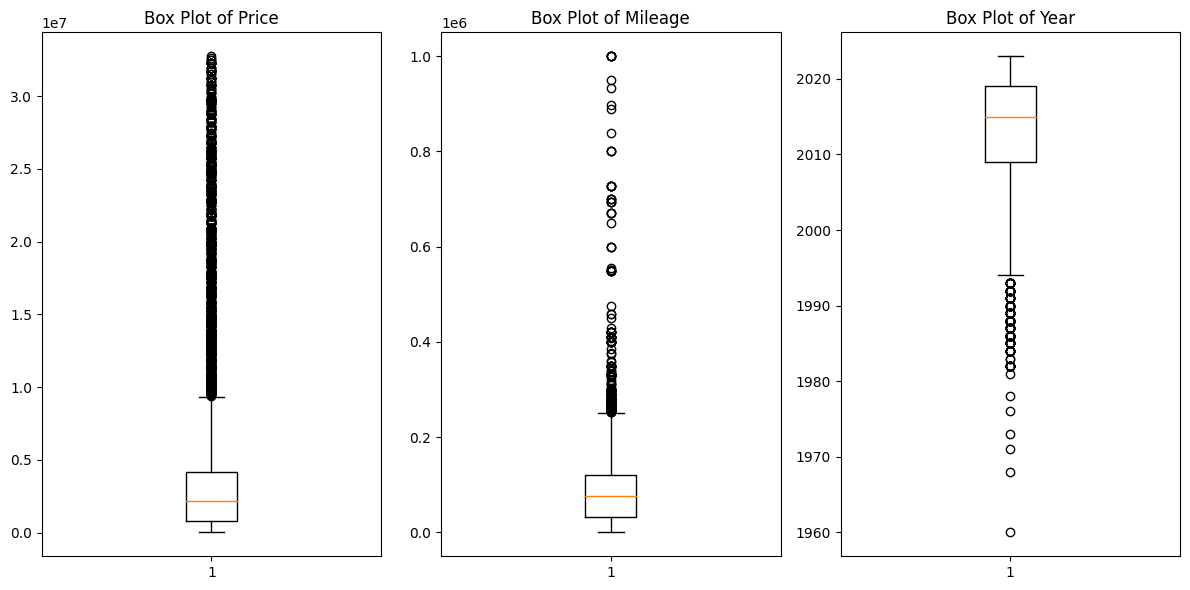

In [77]:
import matplotlib.pyplot as plt

# Create subplots for each column
plt.figure(figsize=(12, 6))

# Box plot for Price
plt.subplot(1, 3, 1)
plt.boxplot(df['Price'])
plt.title('Box Plot of Price')

# Box plot for Mileage
plt.subplot(1 , 3, 2)
plt.boxplot(df['Mileage'])
plt.title('Box Plot of Mileage')

# Box plot for Year
plt.subplot(1, 3, 3)
plt.boxplot(df['Year'])
plt.title('Box Plot of Year')

plt.tight_layout()
plt.show()


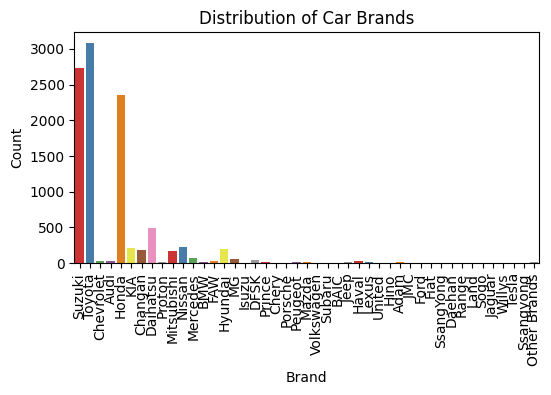

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))  # Set the figure size
sns.countplot(x='Brand',  data=Mega_df, palette='Set1')  # Create the bar chart

plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

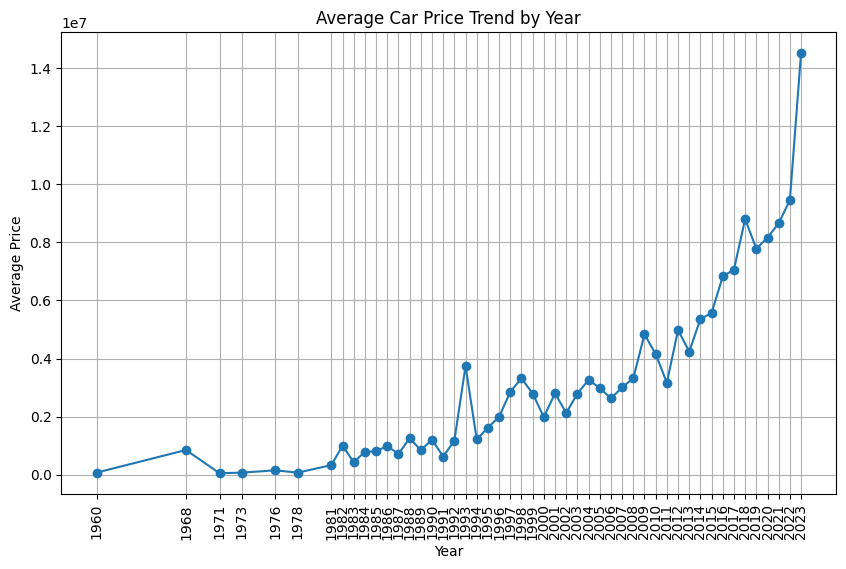

In [79]:
yearly_price_mean = Mega_df.groupby('Year')['Price'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(yearly_price_mean.index, yearly_price_mean.values, marker='o')  # Create the line chart
plt.title('Average Car Price Trend by Year')  # Set the title
plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Average Price')  # Set the y-axis label
plt.xticks(rotation=90)
plt.xticks(yearly_price_mean.index)  # Set x-axis ticks
plt.grid(True)  # Add grid lines
plt.show()  # Show the plot

## Now Perfoming ML

In [80]:
# Importing Libraries 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
# yearly_price_mean = Mega_df.groupby('Year')['Price'].mean()
# display(yearly_price_mean)

# df

In [81]:
LabelEncoder = LabelEncoder()
clf1 = MultinomialNB()
clf2 = BernoulliNB()

df['Brand_encoded'] = LabelEncoder.fit_transform(df['Brand'])
df['Fuel_encoded'] = LabelEncoder.fit_transform(df['Fuel'])
df['Model_encoded'] = LabelEncoder.fit_transform(df['Model'])

numeric_columns = ['Price', 'Mileage', 'Year']
# scaler = StandardScaler()
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

drop_columns = ['Model','Brand','Fuel']
df = df.drop(columns= drop_columns)

df.rename(columns={"Brand_encoded": "Brand"}, inplace=True)
df.rename(columns={"Model_encoded": "Model"}, inplace=True)
df.rename(columns={"Fuel_encoded": "Fuel"}, inplace=True)
new_order = ['Model', 'Price', 'Brand', 'Mileage', 'Year', 'Fuel']
# Reorder the columns
df = df[new_order]

x = df.drop('Price',axis=1)
y = df['Price']

# x['fuel'].dtype()
# df.to_csv('./processed_data.csv', index=False)

C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\3920484492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand_encoded'] = LabelEncoder.fit_transform(df['Brand'])
C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\3920484492.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fuel_encoded'] = LabelEncoder.fit_transform(df['Fuel'])
C:\Users\hp2023\AppData\Local\Temp\ipykernel_5448\3920484492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

KeyError: 'fuel'

In [ ]:
# import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3) for the Price column
Q1 = np.percentile(df['Price'], 25)
Q3 = np.percentile(df['Price'], 75)

# Calculate the Interquartile Range (IQR) for Price
IQR = Q3 - Q1

# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers in the Price column
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print("Interquartile Range (IQR) for Price:", IQR)
print("Lower Bound for Price:", lower_bound)
print("Upper Bound for Price:", upper_bound)
print("Potential Outliers in Price:", outliers)


Interquartile Range (IQR) for Price: 0.10476481368356749
Lower Bound for Price: -0.13393402565668905
Upper Bound for Price: 0.2851252290775809
Potential Outliers in Price:       Model     Price  Brand   Mileage      Year  Fuel
109       8  0.286805      3  0.000000  1.000000     2
3907    138  0.288332     39  0.079999  0.746032     5
886     312  0.289859     41  0.054999  0.904762     3
7164    312  0.289859     41  0.054999  0.904762     3
272     231  0.289859     41  0.000000  1.000000     5
...     ...       ...    ...       ...       ...   ...
7510    122  0.984728     41  0.164999  0.857143     5
6008    231  0.992364     41  0.124999  0.841270     5
5961    231  0.992364     41  0.072999  0.857143     5
2626     38  0.996946     41  0.159999  0.841270     3
1740    110  1.000000     15  0.111999  0.825397     5

[916 rows x 6 columns]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_test, y_test

(      Model  Brand   Mileage      Year  Fuel
 6724     33     39  0.002499  0.984127     5
 4679    100     15  0.401999  0.682540     5
 7509     38     41  0.099999  0.857143     3
 7201    107     15  0.064999  0.904762     5
 2171    403     18  0.149999  0.841270     1
 ...     ...    ...       ...       ...   ...
 1663    122     41  0.017999  0.984127     5
 9915    115     15  0.123455  0.666667     5
 8558    401     15  0.194999  0.857143     3
 6273    341     26  0.034999  0.698413     5
 9627    134     41  0.149999  0.888889     5
 
 [1936 rows x 5 columns],
 6724    0.885156
 4679    0.040929
 7509    0.121258
 7201    0.161576
 2171    0.015577
           ...   
 1663    0.021686
 9915    0.047037
 8558    0.144777
 6273    0.140195
 9627    0.121869
 Name: Price, Length: 1936, dtype: float64)

Liner Regration: 

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse} of Linear Regression")





Mean Squared Error: 0.02722156144453981 of Linear Regression


Mean Squared Error: 0.02722156144453981 of Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse} of Random Forest Regressor")


Mean Squared Error: 0.029588764256710906 of Random Forest Regressor


Mean Squared Error: 0.01272752528821466 of Random Forest Regressor